/run/user/1000/gvfs/sftp:host=hkqai/home/chenzihao/workdir/cadft/validate/validate-ccdft-2024-06-09-11-41-40-302/train.csv


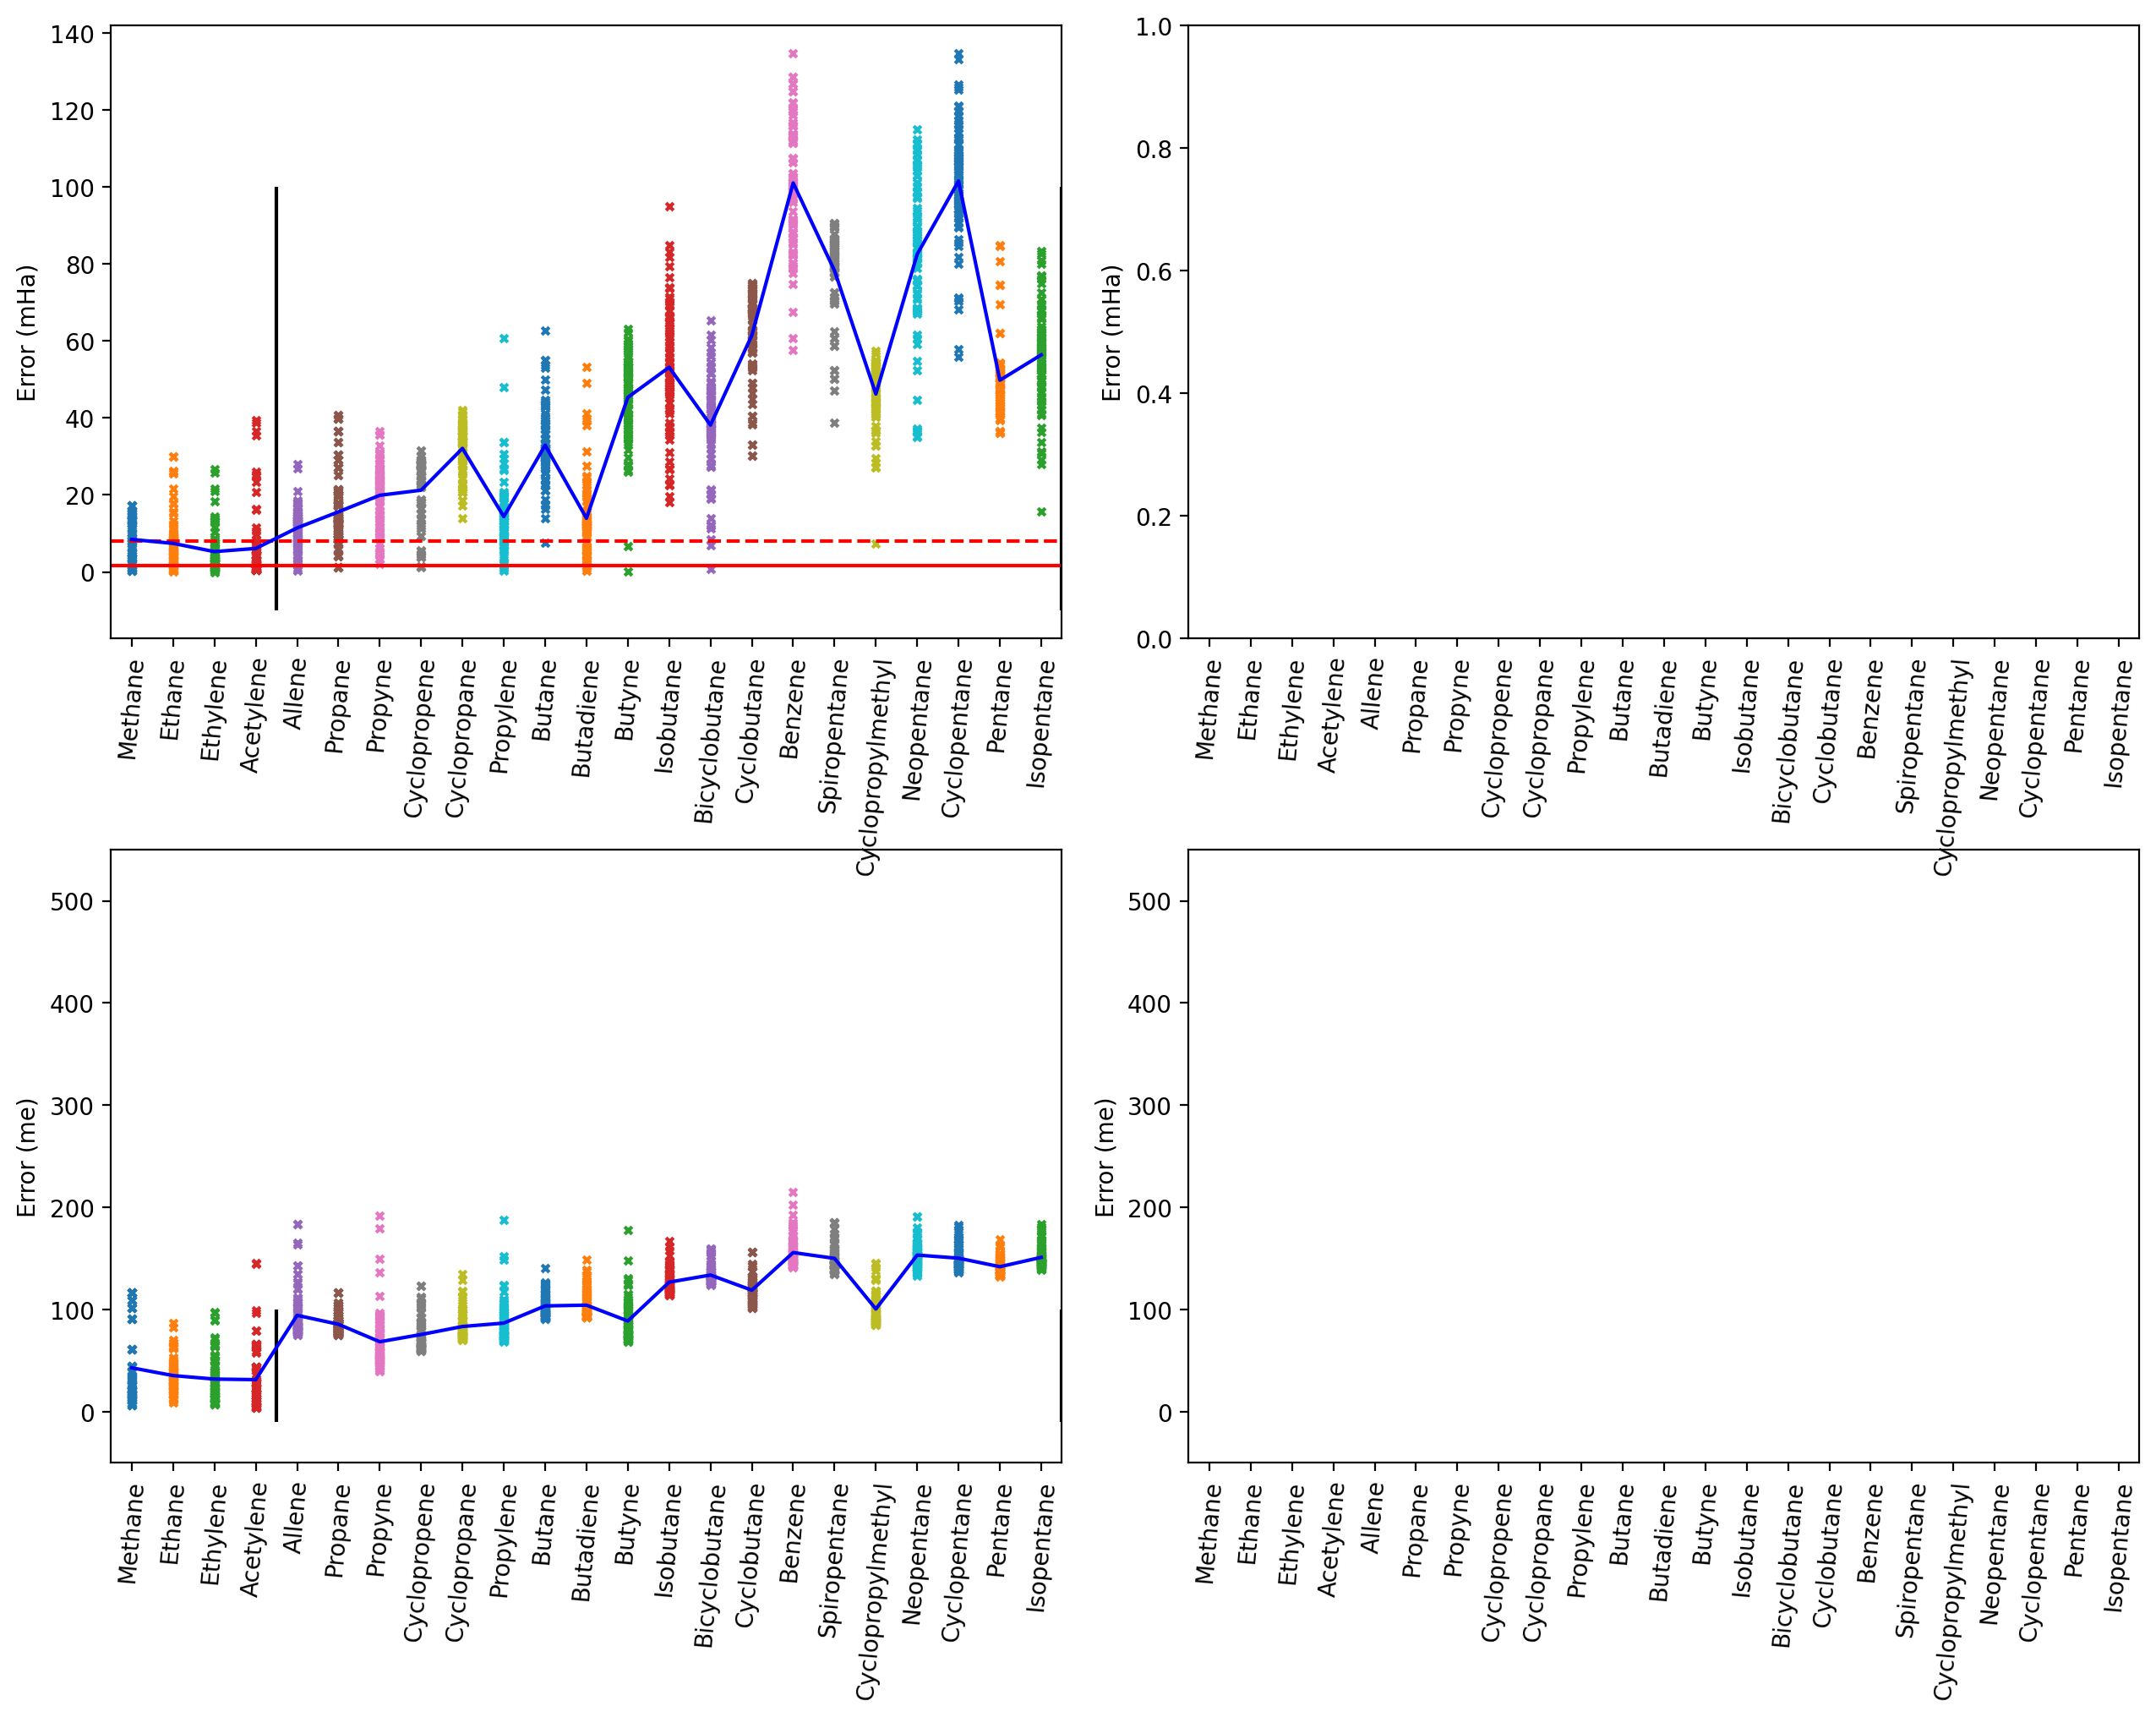

In [9]:
from pathlib import Path
import datetime

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from train import TRAIN_STR_DICT, EVAL_STR_DICT

f, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.reshape(2, 2)

begin_y = 0.075
end_y = 0.925
int_y = 0.125
begin_x = 0.125
end_x = 0.925
int_x = 0.05
end_x += int_x
end_y += int_y

shapexy = np.shape(axes)
inter_x = np.linspace(begin_x, end_x, shapexy[1] + 1)
inter_y = np.linspace(begin_y, end_y, shapexy[0] + 1)

delta_x = inter_x[1] - inter_x[0] - int_x
delta_y = inter_y[1] - inter_y[0] - int_y

for i in range(shapexy[0]):
    for j in range(shapexy[1]):
        axes[i][j].set_position(
            [
                inter_x[j],
                inter_y[i],
                inter_x[j + 1] - inter_x[j] - int_x,
                inter_y[i + 1] - inter_y[i] - int_y,
            ]
        )

axes = axes[::-1, :]

# model_number = "2024-05-31-11-36-26-200"
model_number = "validate-ccdft-2024-06-09-11-41-40-302"
# load_name = f"checkpoints/checkpoint-ccdft-{model_number}"
load_name = f"/run/user/1000/gvfs/sftp:host=hkqai/home/chenzihao/workdir/cadft/validate/{model_number}"
load_path = Path(f"{load_name}")

# list_of_path_dft = list(Path("validate/").glob("dft"))
# load_path_dft = max(list_of_path_dft, key=lambda p: p.stat().st_ctime)

i_row_pd_l = {
    0: 0,
    1: 3,
}

loss_rho_l, loss_ene_l = [], []

list_of_load_path_train = list(load_path.glob("train.csv"))
load_path_train = max(list_of_load_path_train, key=lambda p: p.stat().st_ctime)
print(load_path_train)
data = pd.read_csv(load_path_train)
# print(data_train["loss_rho"].mean(), data_train["loss_ene"].mean())

# list_of_load_path_eval = list(load_path.glob("eval-loss-*.csv"))
# load_path_eval = max(list_of_load_path_eval, key=lambda p: p.stat().st_ctime)
# print(load_path_eval)
# data_eval = pd.read_csv(load_path_eval)
# data = pd.concat([data_train, data_eval])
# print(data_eval["loss_rho"].mean(), data_eval["loss_ene"].mean())

number_draw = 0

for dict_ in [TRAIN_STR_DICT, EVAL_STR_DICT]:
    for i_name in dict_:
        data_tmp = data.loc[data["name"].str.contains(i_name)]

        data_loss_rho = data_tmp["loss_rho"]
        data_loss_ene = data_tmp["loss_ene"]

        loss_rho_l.append(data_loss_rho.mean())
        loss_ene_l.append(data_loss_ene.mean())

        axes[1, 0].scatter(
            np.zeros_like(data_loss_rho) + number_draw, data_loss_rho, s=10, marker="x"
        )
        axes[0, 0].scatter(
            np.zeros_like(data_loss_ene) + number_draw, data_loss_ene, s=10, marker="x"
        )
        number_draw += 1

    axes[0, 0].vlines(number_draw - 0.5, -10, 100, "k")
    axes[1, 0].vlines(number_draw - 0.5, -10, 100, "k")

axes[0, 0].hlines(1 / 0.627, -0.5, 100 - 0.5, "r")
axes[0, 0].hlines(5 / 0.627, -0.5, 100 - 0.5, "r", linestyle="--")

# data = pd.read_csv(load_path / "eval.csv")
# for j, j_name in enumerate(EVAL_STR_DICT):
#     data_np = data.filter(regex=(f"{j_name}.*")).to_numpy()[i_row_pd, :]
#     data_np_sort = np.sort(np.abs(data_np))[1:]
#     error_l.append(np.mean(data_np_sort))
#     axes[i_row, 0].scatter(
#         i + j + np.zeros_like(data_np_sort), data_np_sort, s=10, marker="x"
#     )

# axes[i_row, 0].set_xticks(
#     range(len(TRAIN_STR_DICT) + len(EVAL_STR_DICT)),
#     TRAIN_STR_DICT + EVAL_STR_DICT,
#     rotation=85,
# )

# axes[i_row, 0].plot(range(len(TRAIN_STR_DICT) + len(EVAL_STR_DICT)), error_l, "b")

# ## DFT
# error_l = []
# data = pd.read_csv(load_path_dft / "train_dft.csv")
# for i, i_name in enumerate(TRAIN_STR_DICT):
#     if i_row == 0:
#         data_eq = data.filter(regex=(f"{i_name}_0_1_0.0000")).to_numpy()[0]
#     else:
#         data_eq = 0
#     data_np = data.filter(regex=(f"{i_name}.*")).to_numpy()[i_row_pd, :] - data_eq
#     data_np_sort = np.sort(np.abs(data_np))[1:]
#     error_l.append(np.mean(data_np_sort))
#     axes[i_row, 1].scatter(
#         i + np.zeros_like(data_np_sort), data_np_sort, s=10, marker="x"
#     )

# i += 1
# axes[i_row, 1].vlines(i - 0.5, -10, 100, "k")
# axes[0, 1].hlines(1 / 0.627, -0.5, 100 - 0.5, "r")
# axes[0, 1].hlines(5 / 0.627, -0.5, 100 - 0.5, "r", linestyle="--")

# data = pd.read_csv(load_path_dft / "eval_dft.csv")
# for j, j_name in enumerate(EVAL_STR_DICT):
#     if i_row == 0:
#         data_eq = data.filter(regex=(f"{j_name}_0_1_0.0000")).to_numpy()[0]
#     else:
#         data_eq = 0
#     data_np = data.filter(regex=(f"{j_name}.*")).to_numpy()[i_row_pd, :] - data_eq
#     data_np_sort = np.sort(np.abs(data_np))[1:]
#     error_l.append(np.mean(data_np_sort))
#     axes[i_row, 1].scatter(
#         i + j + np.zeros_like(data_np_sort), data_np_sort, s=10, marker="x"
#     )

axes[0, 0].plot(range(len(TRAIN_STR_DICT) + len(EVAL_STR_DICT)), loss_ene_l, "b")
axes[1, 0].plot(range(len(TRAIN_STR_DICT) + len(EVAL_STR_DICT)), loss_rho_l, "b")

for i_row in range(2):
    for i_col in range(2):
        axes[i_row, i_col].set_xticks(
            range(len(TRAIN_STR_DICT) + len(EVAL_STR_DICT)),
            TRAIN_STR_DICT + EVAL_STR_DICT,
            rotation=85,
        )
        axes[i_row, i_col].set_xlim(-0.5, len(TRAIN_STR_DICT) + len(EVAL_STR_DICT) - 0.5)
        axes[i_row, i_col].set_xlim(-0.5, len(TRAIN_STR_DICT) + len(EVAL_STR_DICT) - 0.5)

# axes[0, 0].set_ylim(-2, 22)
axes[0, 0].set_ylabel("Error (mHa)")
axes[1, 0].set_ylim(-50, 550)
axes[1, 0].set_ylabel("Error (me)")
# axes[0, 1].set_ylim(-2, 22)
axes[0, 1].set_ylabel("Error (mHa)")
axes[1, 1].set_ylim(-50, 550)
axes[1, 1].set_ylabel("Error (me)")
plt.savefig(
    f"./manu/figures/{model_number}.pdf",
    bbox_inches="tight",
)

2179    Isopentane_2_3_0.1000
2180    Isopentane_2_3_0.2000
2181    Isopentane_2_3_0.3000
2182    Isopentane_2_3_0.4000
2183    Isopentane_2_3_0.5000
Name: name, dtype: object

In [14]:
data

,name,loss_rho,loss_ene
0,Methane_0_1_-0.5000,23.818308,0.804688
1,Methane_0_1_-0.4000,18.273802,0.867801
2,Methane_0_1_-0.3000,18.522665,0.417797
3,Methane_0_1_-0.2000,19.421247,0.007402
4,Methane_0_1_-0.1000,19.957577,0.866925
...,...,...,...
1724,Isopentane_2_3_0.1000,198.852055,72.837406
1725,Isopentane_2_3_0.2000,211.668473,91.077228
1726,Isopentane_2_3_0.3000,223.737862,85.934916
1727,Isopentane_2_3_0.4000,233.660665,89.666437
